In [13]:
import pandas as pd

%matplotlib inline

In [14]:
assess = pd.read_csv('Property_Assessment__Customer_Service__-_Edmonton_Insight_Community.csv')

In [15]:
assess.Q3_CityContact.unique()

array(["I don't recall", 'I haven’t contacted the City',
       'Within the last three years', nan, 'Within the last year',
       'Within the last 6 months', 'Within the last 3 months'],
      dtype=object)

In [16]:
dfnull = assess[assess.Q3_CityContact.isnull()]

print('The number of null responces for City Contact is = {}'.format(len(dfnull)))

The number of null responces for City Contact is = 367


In [17]:
df_norecall = assess[assess.Q3_CityContact == "I don't recall"]

print('The number of no recall responces for City Contact is = {}'.format(len(df_norecall)))

The number of no recall responces for City Contact is = 157


In [18]:
df_nocontact = assess[assess.Q3_CityContact == "I haven’t contacted the City"]

print('The number of no contact responces for City Contact is = {}'.format(len(df_nocontact)))

The number of no contact responces for City Contact is = 1468


In [19]:
df_contact = assess[~assess.Q3_CityContact.isnull()]
df_contact = df_contact[~(df_contact.Q3_CityContact == "I don't recall")]
df_contact = df_contact[~(df_contact.Q3_CityContact == "I haven’t contacted the City")]

print('The number of contact responces for City Contact is = {}'.format(len(df_contact)))

The number of contact responces for City Contact is = 305


In [20]:
assign = assess['Q5_CommsAgreement_The City’s assessment team does a good job assigning property values']
fair = assess['Q5_CommsAgreement_The assessed value of my property is fair']
accurate = assess['Q5_CommsAgreement_The assessed value of my property is accurate']
info = assess['Q5_CommsAgreement_Overall, I’m satisfied with access to property assessment information']

assign = assign.sort_values()
fair = fair.sort_values()
accurate = accurate.sort_values()
info = info.sort_values()

In [21]:
dfnull2 = assign.isnull()
dfnull3 = fair.isnull()
dfnull4 = accurate.isnull()
dfnull5 = info.isnull()

print('The number of null responces for: \nThe City’s assessment team does a good job assigning property values is = \n{}'.format(len(dfnull2)))
print('\nThe number of null responces for: \nThe assessed value of my property is fair is = \n{}'.format(len(dfnull3)))
print('\nThe number of null responces for: \nThe assessed value of my property is accurate is = \n{}'.format(len(dfnull4)))
print('\nThe number of null responces for: \nOverall, I’m satisfied with access to property assessment information is = \n{}'.format(len(dfnull5)))

The number of null responces for: 
The City’s assessment team does a good job assigning property values is = 
2297

The number of null responces for: 
The assessed value of my property is fair is = 
2297

The number of null responces for: 
The assessed value of my property is accurate is = 
2297

The number of null responces for: 
Overall, I’m satisfied with access to property assessment information is = 
2297


In [22]:
# Remove the 305 null responses in the dataset
assign = assign[~assign.isnull()]
fair = fair[~fair.isnull()]
accurate = accurate[~accurate.isnull()]
info = info[~info.isnull()]

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


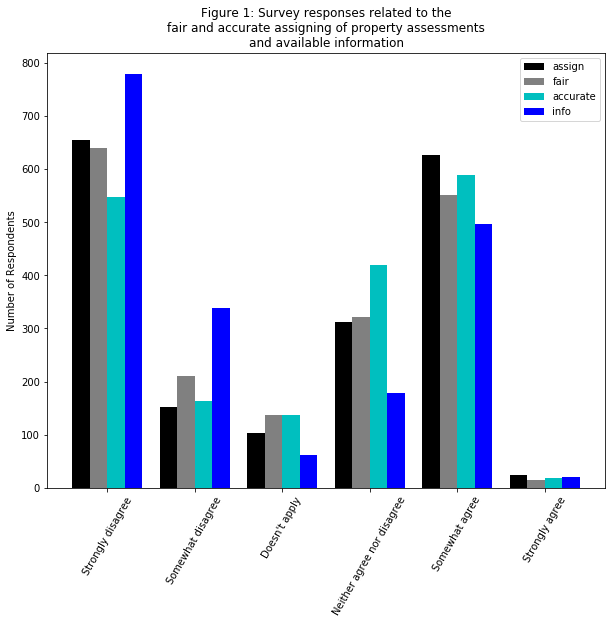

In [23]:
import matplotlib.pyplot as plt



labels = ['Strongly disagree', 'Somewhat disagree', "Doesn't apply", 
          "Neither agree nor disagree", 'Somewhat agree', 'Strongly agree']

def create_x(t, w, n, d):
    '''n is n dataset (out of t)
    t is Number of datasets
    d is Number of sets of bars
    w is Width of each bar'''
    
    return [t*x + w*n for x in range(d)]

plt.figure(figsize=(10,8))

store1_x = create_x(4, 0.8, 1, 6)
_ = plt.bar(store1_x, assign.value_counts(sort=False).values, label='assign', color='k')

store2_x = create_x(4, 0.8, 2, 6)
_ = plt.bar(store2_x, fair.value_counts(sort=False).values, label='fair', color='grey')

store3_x = create_x(4, 0.8, 3, 6)
_ = plt.bar(store3_x, accurate.value_counts(sort=False).values, label='accurate', color='c')

store4_x = create_x(4, 0.8, 4, 6)
_ = plt.bar(store4_x, info.value_counts(sort=False).values, label='info', color='b')

#create your ax object here
ax = plt.subplot()
middle_x = [(a + b + c + d) / 4.0 for a, b, c, d in zip(store1_x, store2_x, store3_x, store4_x)]
_ = ax.set_xticks(middle_x)
_ = ax.set_xticklabels(labels,rotation=60)

_ = plt.title('Figure 1: Survey responses related to the\n\
fair and accurate assigning of property assessments\n\
and available information')

_ = plt.ylabel('Number of Respondents')

_ = plt.legend()

plt.show()

# Figure 1 Analysis

The above graph visualizes the following survey questions:
- **assign**: The City’s assessment team does a good job assigning property values
- **fair**: The assessed value of my property is fair
- **accurate**: The assessed value of my property is accurate
- **info**: Overall, I’m satisfied with access to property assessment information

We can see from the responses that those respondents that took a negative position (strongly or somewhat disagree) significantly outnumber the respondents who took a positive position (somewhat or strongly agree). In the next section we will look at a hypothesis test to extend this to all Edmonton property owners.

**Generate a 99% Confidence Interval**: for the proportion of Edmonton property owners that want more accurate, fair, and transparent property assessments.

Let's take a look at the survey question related to the accuracy of the property assessment. The following table is the number of people who responded in each category for this question.

In [73]:
a_count = accurate.value_counts(sort=False)
a_count

4 Somewhat agree                547
5 Strongly agree                164
1 Strongly disagree             138
2 Somewhat disagree             420
3 Neither agree nor disagree    589
Doesn't apply                    18
Name: Q5_CommsAgreement_The assessed value of my property is accurate, dtype: int64

In [77]:
agree = np.sum(a_count[['5 Strongly agree', '4 Somewhat agree']])
disagree = np.sum(a_count[['1 Strongly disagree', '2 Somewhat disagree']])
sample_size = agree + disagree

### Calculation for the sample mean
$$ \bar{x} = \frac{1 \cdot \text{disagree} + 0 \cdot \text{agree}}{\text{sample size}} $$

In [78]:
x_bar = (1 * disagree + 0 * agree) / sample_size
x_bar

0.4397163120567376

### Calculation for the sample variance
$$ s^{2} = \frac{{}\text{disagree}(1 - \text{sample mean})^{2} + \text{agree}(1 - \text{sample mean})^{2}}{\text{sample size} -1} $$

In [79]:
variance = (disagree * (1 - x_bar) ** 2 + agree * (1 - x_bar) ** 2) / (sample_size - 1)
variance

0.3141653802268609

In [80]:
sample_standard_deviation = np.sqrt(variance)
sample_standard_deviation

0.5605045764548768

$$ \text{Confident that: } \sigma _{x} \approx \frac{\sigma_{\bar{x}}}{\sqrt{\text{sample size}}} $$

In [81]:
sigma_population = sample_standard_deviation / np.sqrt(sample_size)
sigma_population

0.01573433352760167

`2.58` standard deviations on a z-table give us `99.51%` on the upper limit of our condidence interval.

In [82]:
print('99% chance that a random sample mean for Edmonton property owners \nthat disagree with the accuracy of their property assessments is between: \n{} and {}'.format(x_bar - 2.58 * sigma_population, x_bar + 2.58 * sigma_population))

99% chance that a random sample mean for Edmonton property owners 
that disagree with the accuracy of their property assessments is between: 
0.3991217315555253 and 0.4803108925579499


In [84]:
def confidence(a):
    '''Takes survey question responses—pandas Series—
    and provides the 99% confidence interval.
    '''
    
    count = a.value_counts(sort=False)
    agree = np.sum(count[['5 Strongly agree', '4 Somewhat agree']])
    disagree = np.sum(count[['1 Strongly disagree', '2 Somewhat disagree']])
    sample_size = agree + disagree
    
    x = (1 * disagree + 0 * agree) / sample_size
    var = (disagree * (1 - x) ** 2 + agree * (1 - x) ** 2) / (sample_size - 1)
    dev = np.sqrt(var)
    sigma = dev / np.sqrt(sample_size)
    
    return print('99% chance that a random sample mean for Edmonton property owners \nthat disagree is between: \n{} and {}'.format(x - 2.58 * sigma, x + 2.58 * sigma))

In [86]:
confidence(accurate)

99% chance that a random sample mean for Edmonton property owners 
that disagree is between: 
0.3991217315555253 and 0.4803108925579499


In [87]:
confidence(info)

99% chance that a random sample mean for Edmonton property owners 
that disagree is between: 
0.1189529451111756 and 0.23424793789103193


In [88]:
confidence(fair)

99% chance that a random sample mean for Edmonton property owners 
that disagree is between: 
0.3043265175288288 and 0.39697218376987253


In [89]:
confidence(assign)

99% chance that a random sample mean for Edmonton property owners 
that disagree is between: 
0.2911684445950127 and 0.3885701174964906
